# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?q=kodiak&appid=" + weather_api_key
response = requests.get(url)

In [4]:
d = json.loads(response.text)
d

{'coord': {'lon': -152.4072, 'lat': 57.79},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 285.88,
  'feels_like': 285.35,
  'temp_min': 285.88,
  'temp_max': 285.88,
  'pressure': 1010,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 6.69, 'deg': 130},
 'rain': {'1h': 0.17},
 'clouds': {'all': 90},
 'dt': 1628383353,
 'sys': {'type': 1,
  'id': 7668,
  'country': 'US',
  'sunrise': 1628345867,
  'sunset': 1628403177},
 'timezone': -28800,
 'id': 5866583,
 'name': 'Saint Paul Harbor',
 'cod': 200}

In [5]:
city = 'boston'
url = "http://api.openweathermap.org/data/2.5/weather?q=" + city +"&appid=" + weather_api_key
response = requests.get(url)
d2 = json.loads(response.text)
d2

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 298.81,
  'feels_like': 299.21,
  'temp_min': 296.42,
  'temp_max': 300.4,
  'pressure': 1016,
  'humidity': 68},
 'visibility': 10000,
 'wind': {'speed': 3.13, 'deg': 294, 'gust': 6.26},
 'clouds': {'all': 100},
 'dt': 1628383509,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1628329394,
  'sunset': 1628380606},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
dd = {}
dd['City'] = []
dd['Lat'] = []
dd['Lon'] = []
dd['Temp'] = []
dd['Humidity'] = []
dd['Cloudiness'] =[]
dd['Wind Speed'] =[]
dd['Country'] = []
dd['Date'] =[]

In [7]:
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
for city in cities:
    time.sleep(.1) # sleep 100 ms
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city +"&appid=" + weather_api_key
    print(city)
    response = requests.get(url)
    if response.status_code == 200:
        d = json.loads(response.text)
        dd['City'].append(d['name'])
        dd['Lat'].append( d['coord']['lat'] )
        dd['Lon'].append( d['coord']['lon'] )
        dd['Temp'].append( d['main']['temp'] )
        dd['Humidity'].append( d['main']['humidity'])
        dd['Cloudiness'].append(d['clouds']['all'])
        dd['Wind Speed'].append(d['wind']['speed'])
        dd['Country'].append(d['sys']['country'])
        dd['Date'].append(d['dt'])
    else:
        print('ERROR:', city)

tsihombe
ERROR: tsihombe
taolanaro
ERROR: taolanaro
pacific grove
hermanus
dharchula
lompoc
ponta do sol
chernyshevskiy
illoqqortoormiut
ERROR: illoqqortoormiut
qaanaaq
lascahobas
norman wells
do rud
ERROR: do rud
atuona
dolores
vaini
bethel
saint-philippe
hobart
novo aripuana
berbera
sulangan
tuktoyaktuk
tautira
galway
severo-kurilsk
urazovka
tiksi
cape town
cherskiy
iqaluit
kapaa
imbituba
rikitea
hilo
mataura
acapulco
ganzhou
paradwip
ERROR: paradwip
nouakchott
ushuaia
san vicente de canete
sorland
kruisfontein
takoradi
albany
andra
east london
beloha
avarua
souillac
narrabri
vestmannaeyjar
barentsburg
ERROR: barentsburg
riverton
santa maria da vitoria
carnarvon
geraldton
yellowknife
victoria
sentyabrskiy
ERROR: sentyabrskiy
arraial do cabo
dzhusaly
ERROR: dzhusaly
fairbanks
deputatskiy
paamiut
clyde river
tremedal
ancud
dwarka
grand-santi
jamestown
brahmapuri
ERROR: brahmapuri
cedar city
busselton
jiayuguan
shelburne
nador
havelock
mucurapo
bredasdorp
hopelchen
upernavik
trairi
new 

In [8]:
len(dd['City'])

568

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
df = pd.DataFrame(dd)
df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.6177,-121.9166,290.29,83,20,0.45,US,1628383718
1,Hermanus,-34.4187,19.2345,281.93,67,85,2.00,ZA,1628383612
2,Dhārchula,29.8500,80.5333,296.31,90,99,0.59,IN,1628384033
3,Lompoc,34.6391,-120.4579,293.24,73,1,5.14,US,1628383697
4,Ponta do Sol,32.6667,-17.1000,294.60,88,59,2.36,PT,1628383391
...,...,...,...,...,...,...,...,...,...
563,Slave Lake,55.2834,-114.7690,288.14,67,90,9.77,CA,1628384267
564,Boissevain,49.2306,-100.0559,299.43,21,5,3.10,CA,1628384268
565,Itabira,-19.6192,-43.2269,284.06,96,94,0.59,BR,1628384268
566,Sumenep,-7.0167,113.8667,302.00,72,100,6.85,ID,1628384268


In [10]:
df.to_csv("weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
df[df["Humidity"] > 100]

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

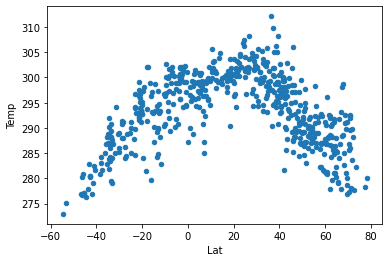

In [12]:
# The code in this cell is analyzing temperature of the city based on its latitude
df.plot('Lat', 'Temp', kind='scatter');

## Latitude vs. Humidity Plot

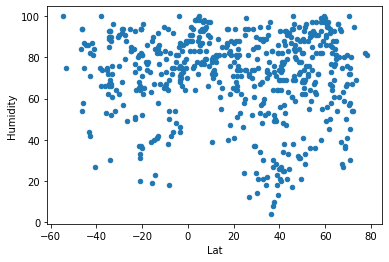

In [13]:
# The code in this cell is analyzing humidity of the city based on its latitude
df.plot('Lat', 'Humidity', kind='scatter');

## Latitude vs. Cloudiness Plot

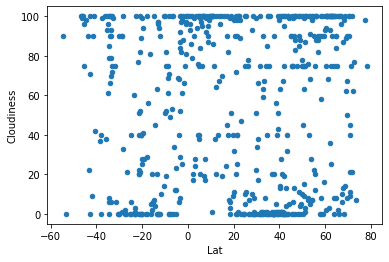

In [14]:
# The code in this cell is analyzing cloudiness of the city based on its latitude
df.plot('Lat', 'Cloudiness', kind='scatter');

## Latitude vs. Wind Speed Plot

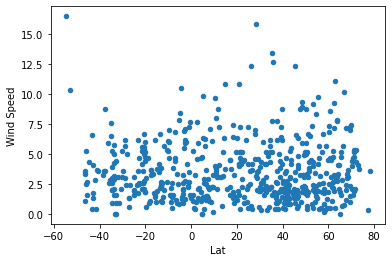

In [15]:
# The code in this cell is analyzing wind speed of the city based on its latitude
df.plot('Lat', 'Wind Speed', kind='scatter');

## Linear Regression

In [16]:
df_north = df[df["Lat"] >= 0]
df_south = df[df["Lat"] < 0]

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

There is a moderate negative correlation between temperature and latitude in the northern hemisphere

The r-value is -0.6649357853347647


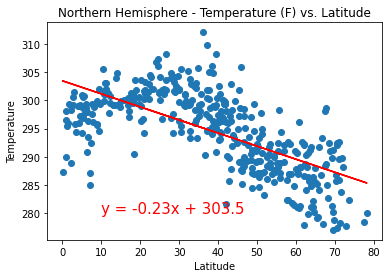

In [17]:
x_values = df_north['Lat']
y_values = df_north['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.show();

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

There is a strong positive correlation between temperature and latitude in the southern hemisphere

The r-value is 0.822652641750538


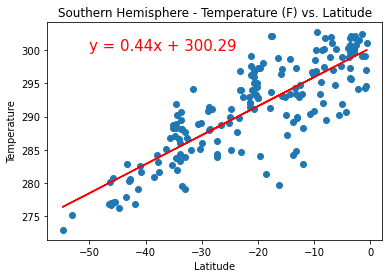

In [18]:
x_values = df_south['Lat']
y_values = df_south['Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.show();

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is little to no correlation between humidity and latitude in the northern hemisphere

The r-value is -0.12650085510376188


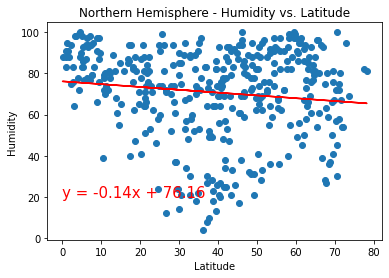

In [19]:
x_values = df_north['Lat']
y_values = df_north['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.show();

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is little to no correlation between humidity and latitude in the southern hemisphere

The r-value is -0.10932499449342765


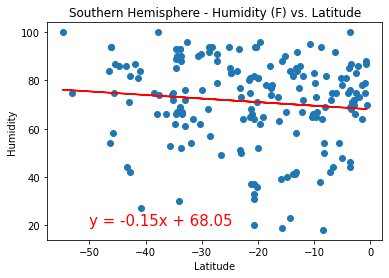

In [20]:
x_values = df_south['Lat']
y_values = df_south['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (F) vs. Latitude')
plt.show();

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is little to no correlation between cloudiness and latitude in the northern hemisphere

The r-value is -0.019185318480967963


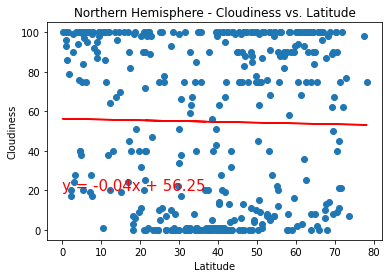

In [21]:
x_values = df_north['Lat']
y_values = df_north['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is little to no correlation between cloudiness and latitude in the southern hemisphere

The r-value is -0.0681176449599412


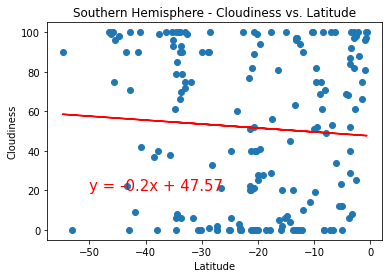

In [22]:
x_values = df_south['Lat']
y_values = df_south['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.show();

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is little to no correlation between wind speed and latitude in the northern hemisphere

The r-value is 0.03127820897373205


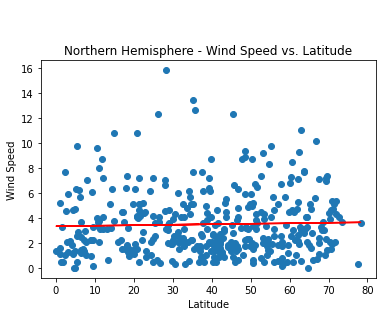

In [23]:
x_values = df_north['Lat']
y_values = df_north['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is little to no correlation between wind speed and latitude in the southern hemisphere

The r-value is -0.04851847371099448


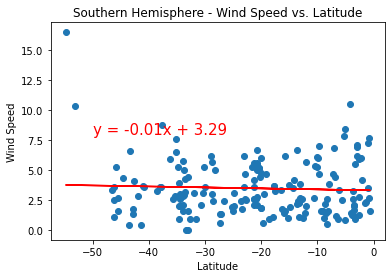

In [24]:
x_values = df_south['Lat']
y_values = df_south['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print("The r-value is", rvalue)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.show();